In [41]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
import pickle
import os

path = os.getcwd()+"\\EBZ_Simulation.pickle"
ebz_simulation = pickle.load(open(path, "rb"))

path = r"C:\Users\thoma\Desktop\ev-modelling-repo\Simulationsauswertung\EBZ NHTS\Werktag\Auswertungsergebnisse\Ladende_Fahrzeuge_CS3.pickle"
ebz_nhts = pickle.load(open(path, "rb"))

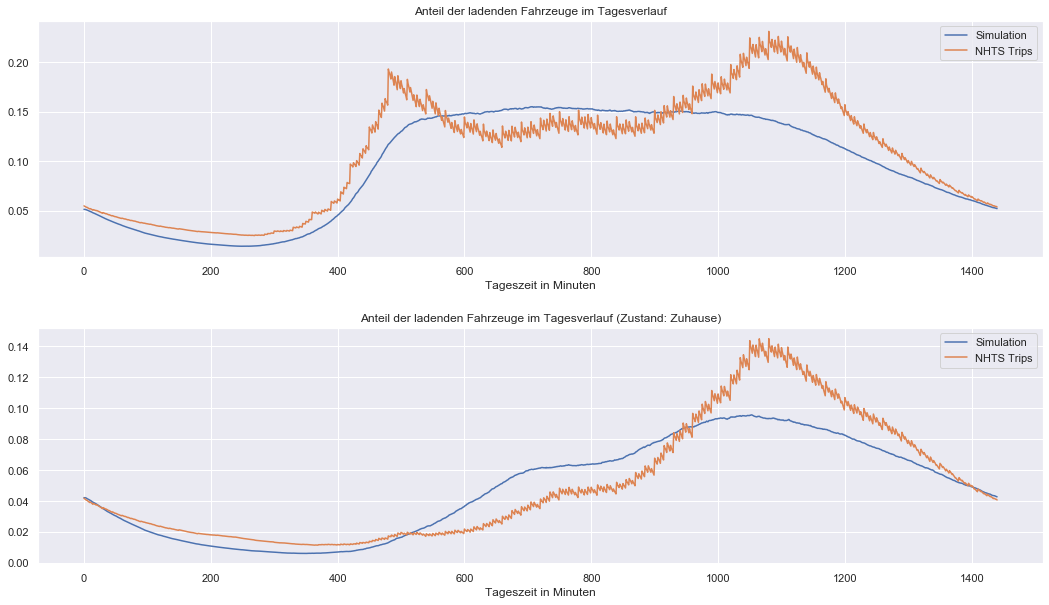

In [43]:
sns.set()
fig, (ax1, ax2)  = plt.subplots(2, 1, figsize=(18,10) )
plt.subplots_adjust(hspace=0.3)

x = np.linspace(0, 1440, 1441)

ax1.plot(x, ebz_simulation[0], label="Simulation");
ax1.plot(x, ebz_nhts[0], label="NHTS Trips")
ax1.set_title("Anteil der ladenden Fahrzeuge im Tagesverlauf");
ax1.set_xlabel("Tageszeit in Minuten");
ax1.legend();

ax2.plot(x, ebz_simulation[1], label="Simulation");
ax2.plot(x, ebz_nhts[1], label="NHTS Trips")
ax2.set_title("Anteil der ladenden Fahrzeuge im Tagesverlauf (Zustand: Zuhause)");
ax2.set_xlabel("Tageszeit in Minuten");
ax2.legend();

Beobachtung:

- überproportionaler Anstieg des Ladebedarfs ab 8:20 (500 min)

Ursache? 

- notwendigerweise Fahrzeuge die schon einen Weg hinter sich gebracht haben


## Vergleiche Charakteristiken der Fahrten die zwischen 500 und 800 Zuhause enden

In [44]:
df_sim = pd.read_csv(r"C:\Users\thoma\Desktop\ev-modelling-repo\Simulationsergebnisse\Results_9_WT_150k_CS3.csv")
df_nhts = pickle.load(open(r"C:\Users\thoma\Desktop\ev-modelling-repo\Simulationsauswertung\EBZ NHTS\Werktag\Auswertungsergebnisse\NHTS_Trips_Werktag_CS3_Ladezeiten.pickle", "rb"))

In [45]:
df_nhts.head()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end
0,300000071,1,1,4,600,40,615,15,8.439,295,100.0,95.9,615.0,642.0
1,300000071,2,4,1,910,61,930,20,8.286,1110,100.0,96.0,930.0,956.0
2,300000073,1,1,2,525,35,540,15,3.621,330,100.0,97.3,540.0,548.0
3,300000073,2,2,1,870,58,885,15,3.610,1080,100.0,97.3,885.0,893.0
4,300000081,1,1,2,675,45,690,15,12.902,720,100.0,96.4,690.0,720.0


In [46]:
filt = (df_sim["Whyto"] == 1) & (df_sim["Arrival"] > 500) & (df_sim["Arrival"] < 800)
sim_filt = df_sim[filt]

In [47]:
filt = (df_nhts["Whyto"] == 1) & (df_nhts["Arrival"] > 500) & (df_nhts["Arrival"] < 800)
nhts_filt = df_nhts[filt]

In [48]:
nhts_filt

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end
21,300000291,3,3,1,650,43,665,15,10.807000,1285,100.0,97.0,665.0,701.0
24,300000292,3,3,1,650,43,665,15,9.816447,20,99.4,97.1,665.0,685.0
26,300000292,5,4,1,750,50,755,5,3.082000,325,100.0,99.3,755.0,766.0
31,300000391,3,3,1,685,46,690,5,1.006000,30,95.2,94.9,690.0,720.0
80,300001371,3,3,1,640,43,655,15,6.811000,1390,96.5,95.1,655.0,734.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596116,407940631,4,5,1,755,50,760,5,3.372000,140,97.7,95.5,760.0,778.0
596124,407940634,2,5,1,520,35,525,5,3.272149,220,98.7,97.3,525.0,537.0
596146,407941171,4,4,1,720,48,731,11,11.304000,249,96.9,93.8,731.0,772.0
596212,407942332,4,3,1,715,48,720,5,3.372000,180,100.0,99.2,720.0,728.0


In [49]:
rel_freq_nhts = len(nhts_filt) / len(df_nhts)
rel_freq_nhts

0.06792179434286921

In [50]:
rel_freq_sim = len(sim_filt) / len(df_sim)
rel_freq_sim

0.10276241547820186

In [51]:
rel_freq_sim / rel_freq_nhts

1.5129520130086258

## 51% mehr Fahrten enden in der Simulation Zuhause im gegebenen Zeitintervall

In [52]:
sum(ebz_simulation[1][500:800]) / sum (ebz_nhts[1][500:800])

1.5349705051242044

## 53% mehr ladende Fahrzeuge im Zeitintervall

In [53]:
nhts_filt["Charge_time"] = nhts_filt["Charge_end"] - nhts_filt["Charge_start"]

C:\Users\thoma\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
nhts_filt.head(20)

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end,Charge_time
21,300000291,3,3,1,650,43,665,15,10.807000,1285,100.0,97.0,665.0,701.0,36.0
24,300000292,3,3,1,650,43,665,15,9.816447,20,99.4,97.1,665.0,685.0,20.0
26,300000292,5,4,1,750,50,755,5,3.082000,325,100.0,99.3,755.0,766.0,11.0
31,300000391,3,3,1,685,46,690,5,1.006000,30,95.2,94.9,690.0,720.0,30.0
80,300001371,3,3,1,640,43,655,15,6.811000,1390,96.5,95.1,655.0,734.0,79.0
88,300001611,2,3,1,640,43,645,5,1.484000,135,99.3,98.6,645.0,654.0,9.0
97,300001942,2,3,1,675,45,690,15,2.309000,270,100.0,99.4,690.0,695.0,5.0
105,300002421,1,1,1,450,30,570,120,78.531577,240,100.0,78.2,570.0,810.0,240.0
177,300004361,3,3,1,720,48,725,5,1.091000,1285,100.0,99.6,725.0,727.0,2.0
183,300004471,6,4,1,685,46,700,15,5.560000,60,87.9,83.8,700.0,746.0,46.0


In [55]:
sim_filt["Charge_time"] = sim_filt["Charge_end"] - sim_filt["Charge_start"]

C:\Users\thoma\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
sim_filt.head()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end,Charge_time
13,3.2,2,2,1,541.0,36,550.0,9.0,4.95,70.0,100.0,98.6,550.0,559.0,9.0
15,3.4,4,4,1,740.0,49,747.0,7.0,4.25,113.0,100.0,98.8,747.0,755.0,8.0
56,12.3,3,4,1,733.0,49,745.0,12.0,7.07,188.0,98.7,96.7,745.0,785.0,40.0
60,13.2,2,2,1,518.0,35,573.0,55.0,31.51,11.0,100.0,87.1,NaN,NaN,NaN
62,13.4,4,5,1,592.0,39,614.0,22.0,12.37,169.0,86.2,81.1,614.0,700.0,86.0


In [57]:
sim_ct = sim_filt["Charge_time"].sum() / len(sim_filt)
sim_ct

38.45918575756544

In [58]:
nhts_ct = nhts_filt["Charge_time"].sum() / len(nhts_filt)
nhts_ct

31.183925925925926

In [59]:
sim_ct / nhts_ct

1.233301600604142

## Durchschnittliche Ladezeit der Fahrzeuge aus Simulation um 23% höher

In [61]:
sim_soc = sim_filt["Soc_end"].sum() / len(sim_filt)
sim_soc

91.79254178438916

In [62]:
nhts_soc = nhts_filt["Soc_end"].sum() / len(nhts_filt)
nhts_soc

93.25371604938272

## Fahrzeuge des NHTS erreichen Zuhause mit durchschnittlich geringerem SOC

In [64]:
sim_soc = sim_filt["Distance"].sum() / len(sim_filt)
sim_soc

10.88475848452871

In [63]:
nhts_soc = nhts_filt["Distance"].sum() / len(nhts_filt)
nhts_soc

9.80933255896974

## Wegstrecken der Simulation im Zeitbereich um 1km höher